# Import e Conhecendo os dados

In [723]:
# Importação das bibliotecas
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

In [724]:
# Upload dos dados


In [725]:
# Preview da qualidade dos dados




Você precisa avaliar a performance global das vendas semanais das lojas do Wallmart. Porém, o processo de estração de dados é devagar e custoso, por isso não seria possível recolher todas as vendas semanais do ano para fazer uma estimativa com precisão de 100%. A única saída é realizar uma amostragem dos dados de uma loja e em cima disso calcular o intervalo de confiança das vendas para que os superioes tenham uma noção da média das vendas da loja.

Pratique os conceitos de amostragem vistos na revisão dentro do dataset e ao final, calcule o intervalo de confiança para uma amostra de 25 e outra de 50 das vendas semanais da loja 20. O valor encontrado está dentro da média populacional da loja 20?

#**Etapa 1**



Nessa etapa iremos importar os dados e bibliotecas e verificar as vendas por loja


1.  Importar as bibliotecas e os dados
2.  Analisar os dados
3.  Verifique as vendas semanais por loja
4. Verifique se as vendas em período de feriado tem uma variação maior








#**Etapa 2**#

Nessa etapa iremos verificar os tipos de amostragem



1. Verifique as amostras (Simples, sistemática, estratificada e clusterizada)




#**Etapa 3 (PLUS)**#

Vamos analisar os dados das lojas conforme solicitado acima



1. Verificando as 20 lojas conforme solicitado utilizando distribuição normal

2. Filtrando o dataset e plotando seu histograma

3. Realizando o teste com amostragem aleatória simples com 25 amostras
4. Verificando a média da população
5. Visualizando a distruibuição por dados com ele são

6. Visualizando a distribuição dos dados aplicando o teorema do limite central

7. Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal

8. Verificando a média da população



# Etapa 01



## População

In [726]:
class Dynamics():
    """
        25/03/22

    """

    def __init__(self):
        path = r'data/Walmart.csv'
        self.df = pd.read_csv(
            path,
            sep=',',
            decimal='.',
            date_parser=['Date']
        )

    def convertendo_a_coluna_date_para_o_tipo_datetime(self):
        self.df['Date'] = pd.to_datetime(
            arg=self.df['Date'],
            format='%d-%m-%Y',
        )

    def criando_a_coluna_year_e_a_coluna_month(self):
        self.df['month'] = self.df['Date'].dt.month
        self.df['year'] = self.df['Date'].dt.year

    def dataframe(self):
        df = self.df
        display(df)
        
    def boxplot_das_vendas_semanais_por_loja(self):
        df = self.df
        fig, axes = plt.subplots(
            figsize=(19, 10),
            dpi=300
        )
        
        sns.boxplot(data=df, x="Store", y="Weekly_Sales")

        plt.show()

    def gráfico_de_dispersão(self):
        lista_de_loja = [20, 4, 14, 33, 8]
        df = self.df[self.df.Store.isin(lista_de_loja)]

        fig, axes = plt.subplots(
            figsize=(19, 10),
            dpi=300
        )

        sns.scatterplot(
            data=df,
            x='Store',
            y='Weekly_Sales'
        )

        plt.show()

    def verificando_se_as_vendas_em_período_de_feriado_tem_uma_variação_maior(self):
        df = self.df

        fig, axes = plt.subplots(
            figsize=(19, 10),
            dpi=300,
        )
        sns.histplot(
            data=df[df.Store == 20],
            x='Weekly_Sales',
            kde=True,
        )
        
        plt.show()
    
    def amostragem_simples(self):
        df = self.df.sample(25)
        display(
            df
        )

    def amostragem_simples_usando_o_seed(self):
        np.random.seed(44)
        df = self.df.sample(
            5,
            random_state= 0,
        )

        display(
            df
        )

    def quantidade_de_classes_distintas_na_amostra(self):
        df = self.df
        df = df['Store'].sample(15, random_state=123).value_counts(normalize=True)
        display(df)

    def amostragem_sistematica(self):
        df = self.df
        passo = 25
        inicial = 132
        indices = np.arange(inicial,df.shape[0],passo)
        df = df.loc[indices]
        display(
            df
        )

    def amostragem_estratificada(self):
        df = self.df
        df = df['Store'].value_counts()
        print(df)

    def amostragem_estratificada_usando_train_test_split(self):
        df = self.df
        # Amostragem estratificada usando train_test_split
        X_1, X_2 = train_test_split(df, test_size = 45, stratify = df['Store'])
        X_2 = X_2['Store'].value_counts()
        print(X_2)

    def amostragem_clusterizada(self):
        df = self.df
        df = df[df.Store==20].sample(frac=0.1)
        display(
            df
        )


if __name__ == '__main__':
    dynamics = Dynamics()

In [727]:
# Convertendo a coluna date para o tipo datetime:
dynamics.convertendo_a_coluna_date_para_o_tipo_datetime()

In [728]:
# Criando a coluna year e month:
dynamics.criando_a_coluna_year_e_a_coluna_month()

In [729]:
# Todos os dados possíveis:
dynamics.dataframe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


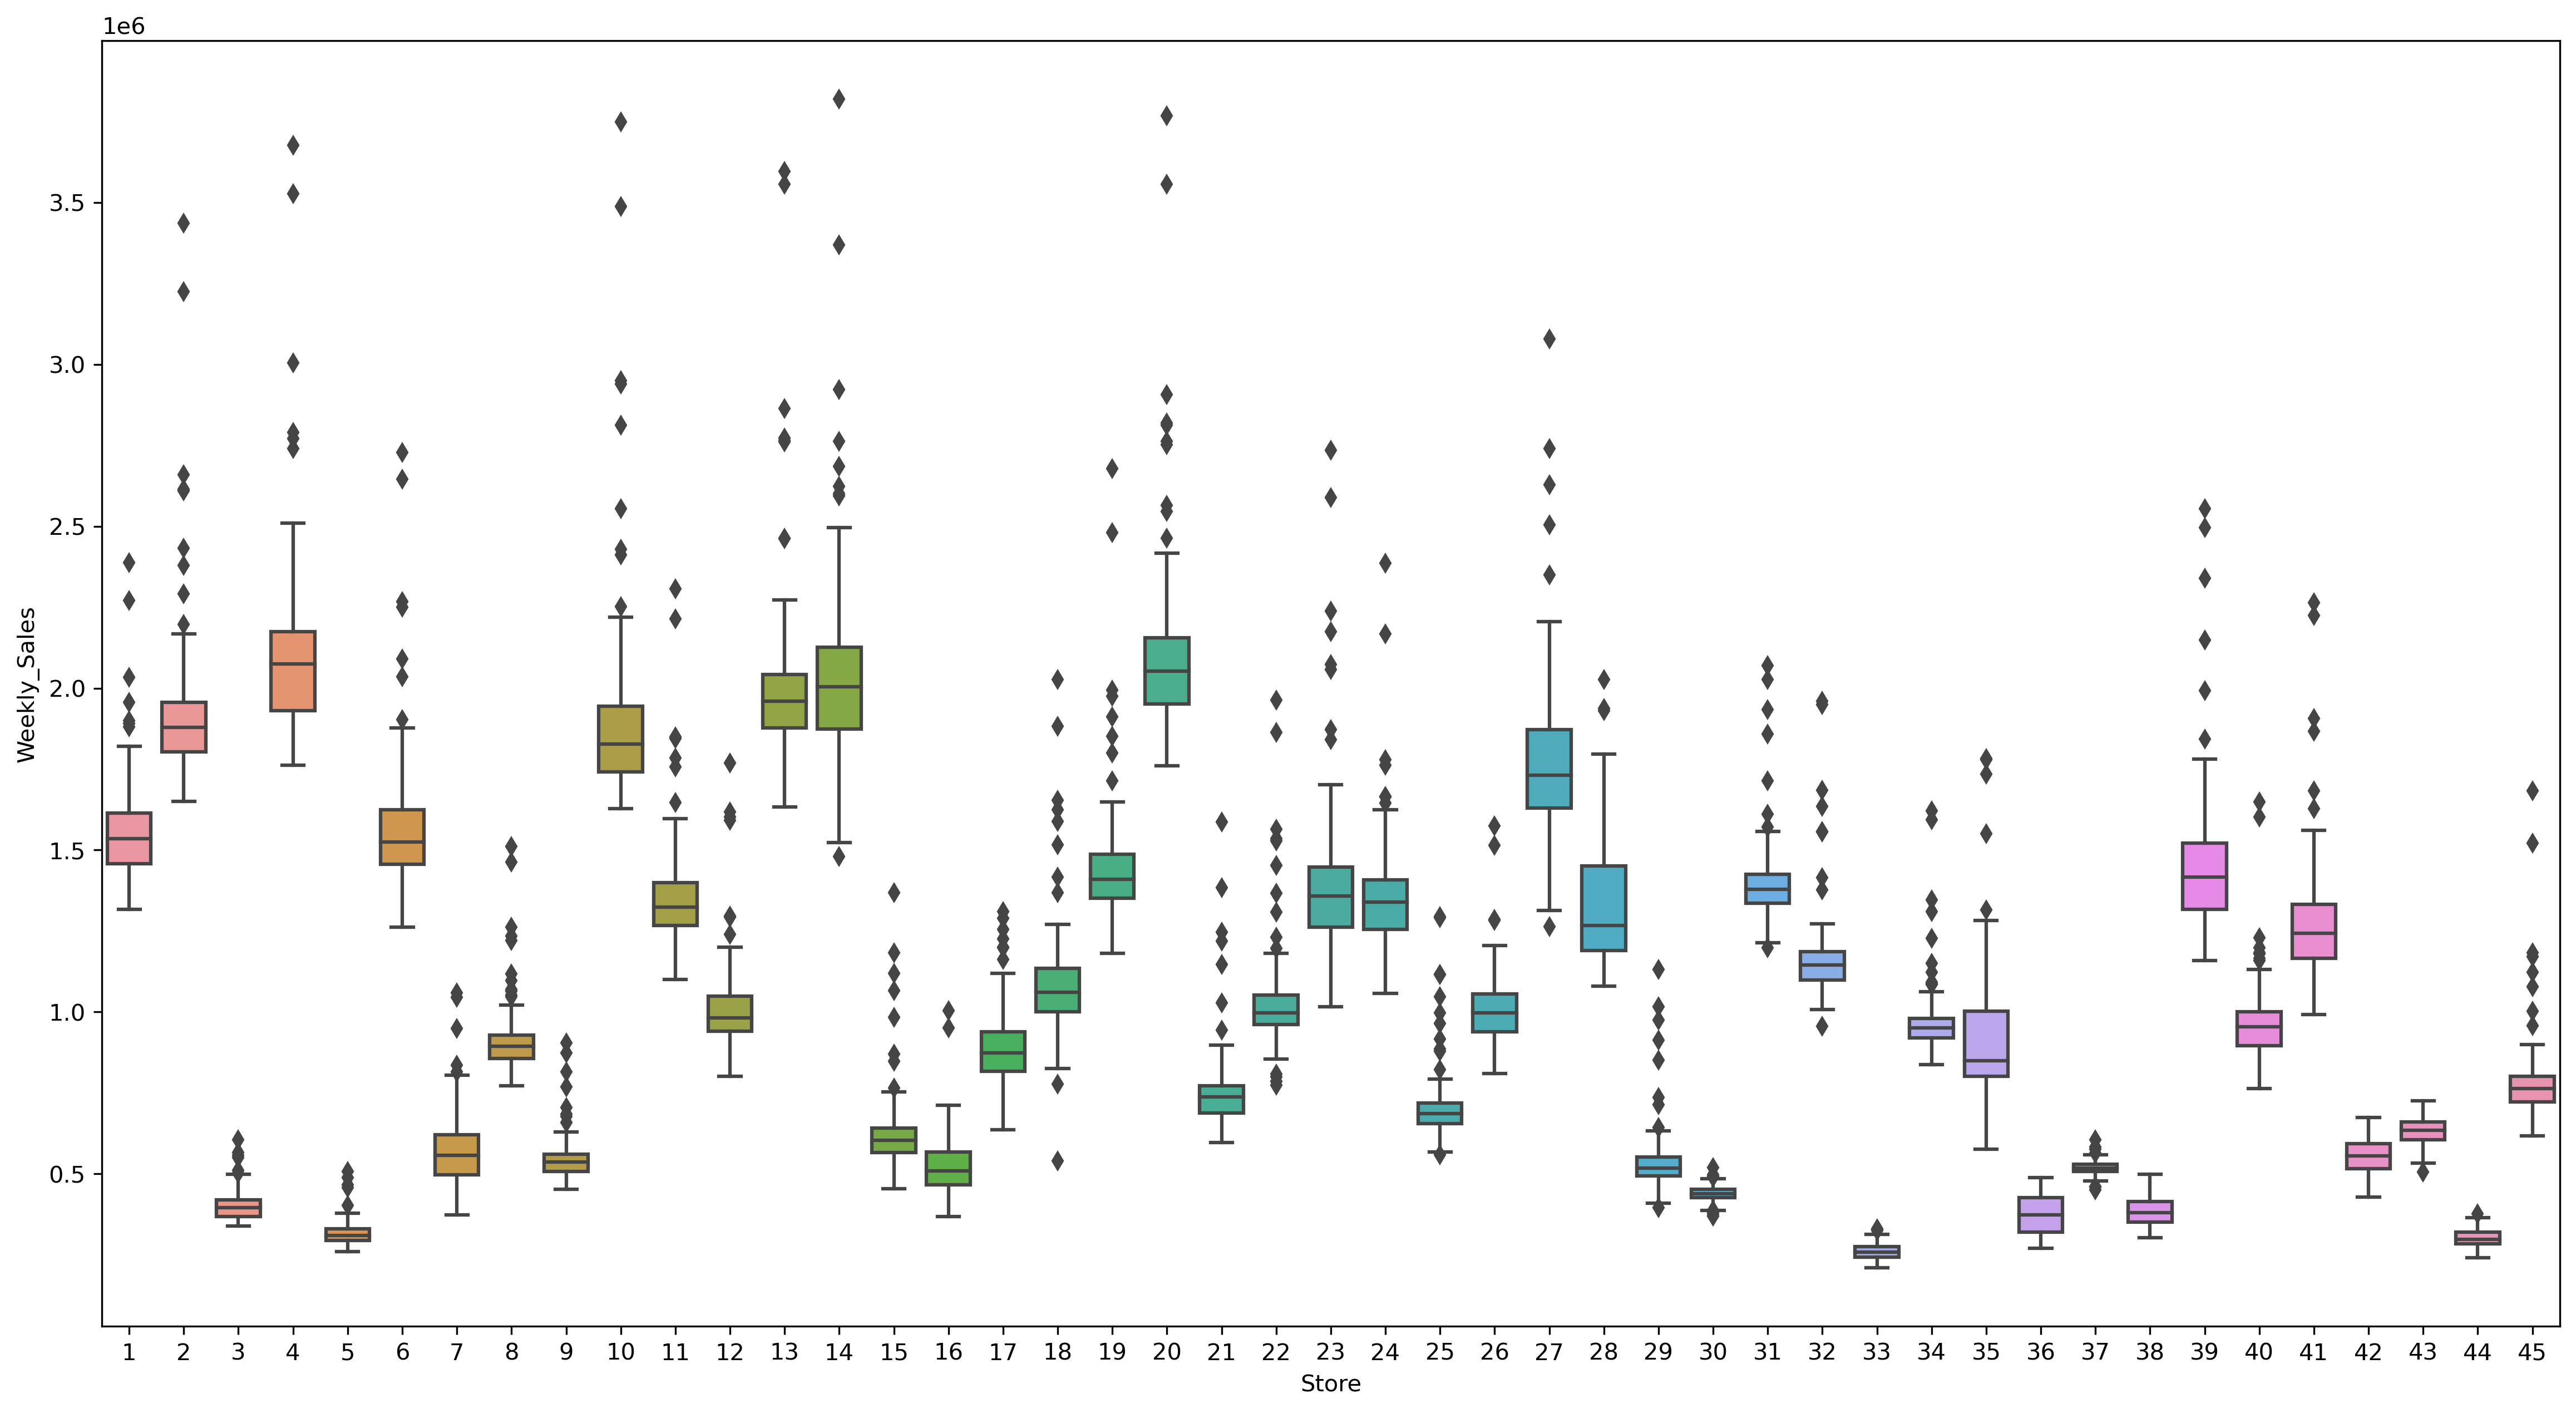

In [730]:
#_Boxplot_das_vendas_semanais_por_loja:
dynamics.boxplot_das_vendas_semanais_por_loja()

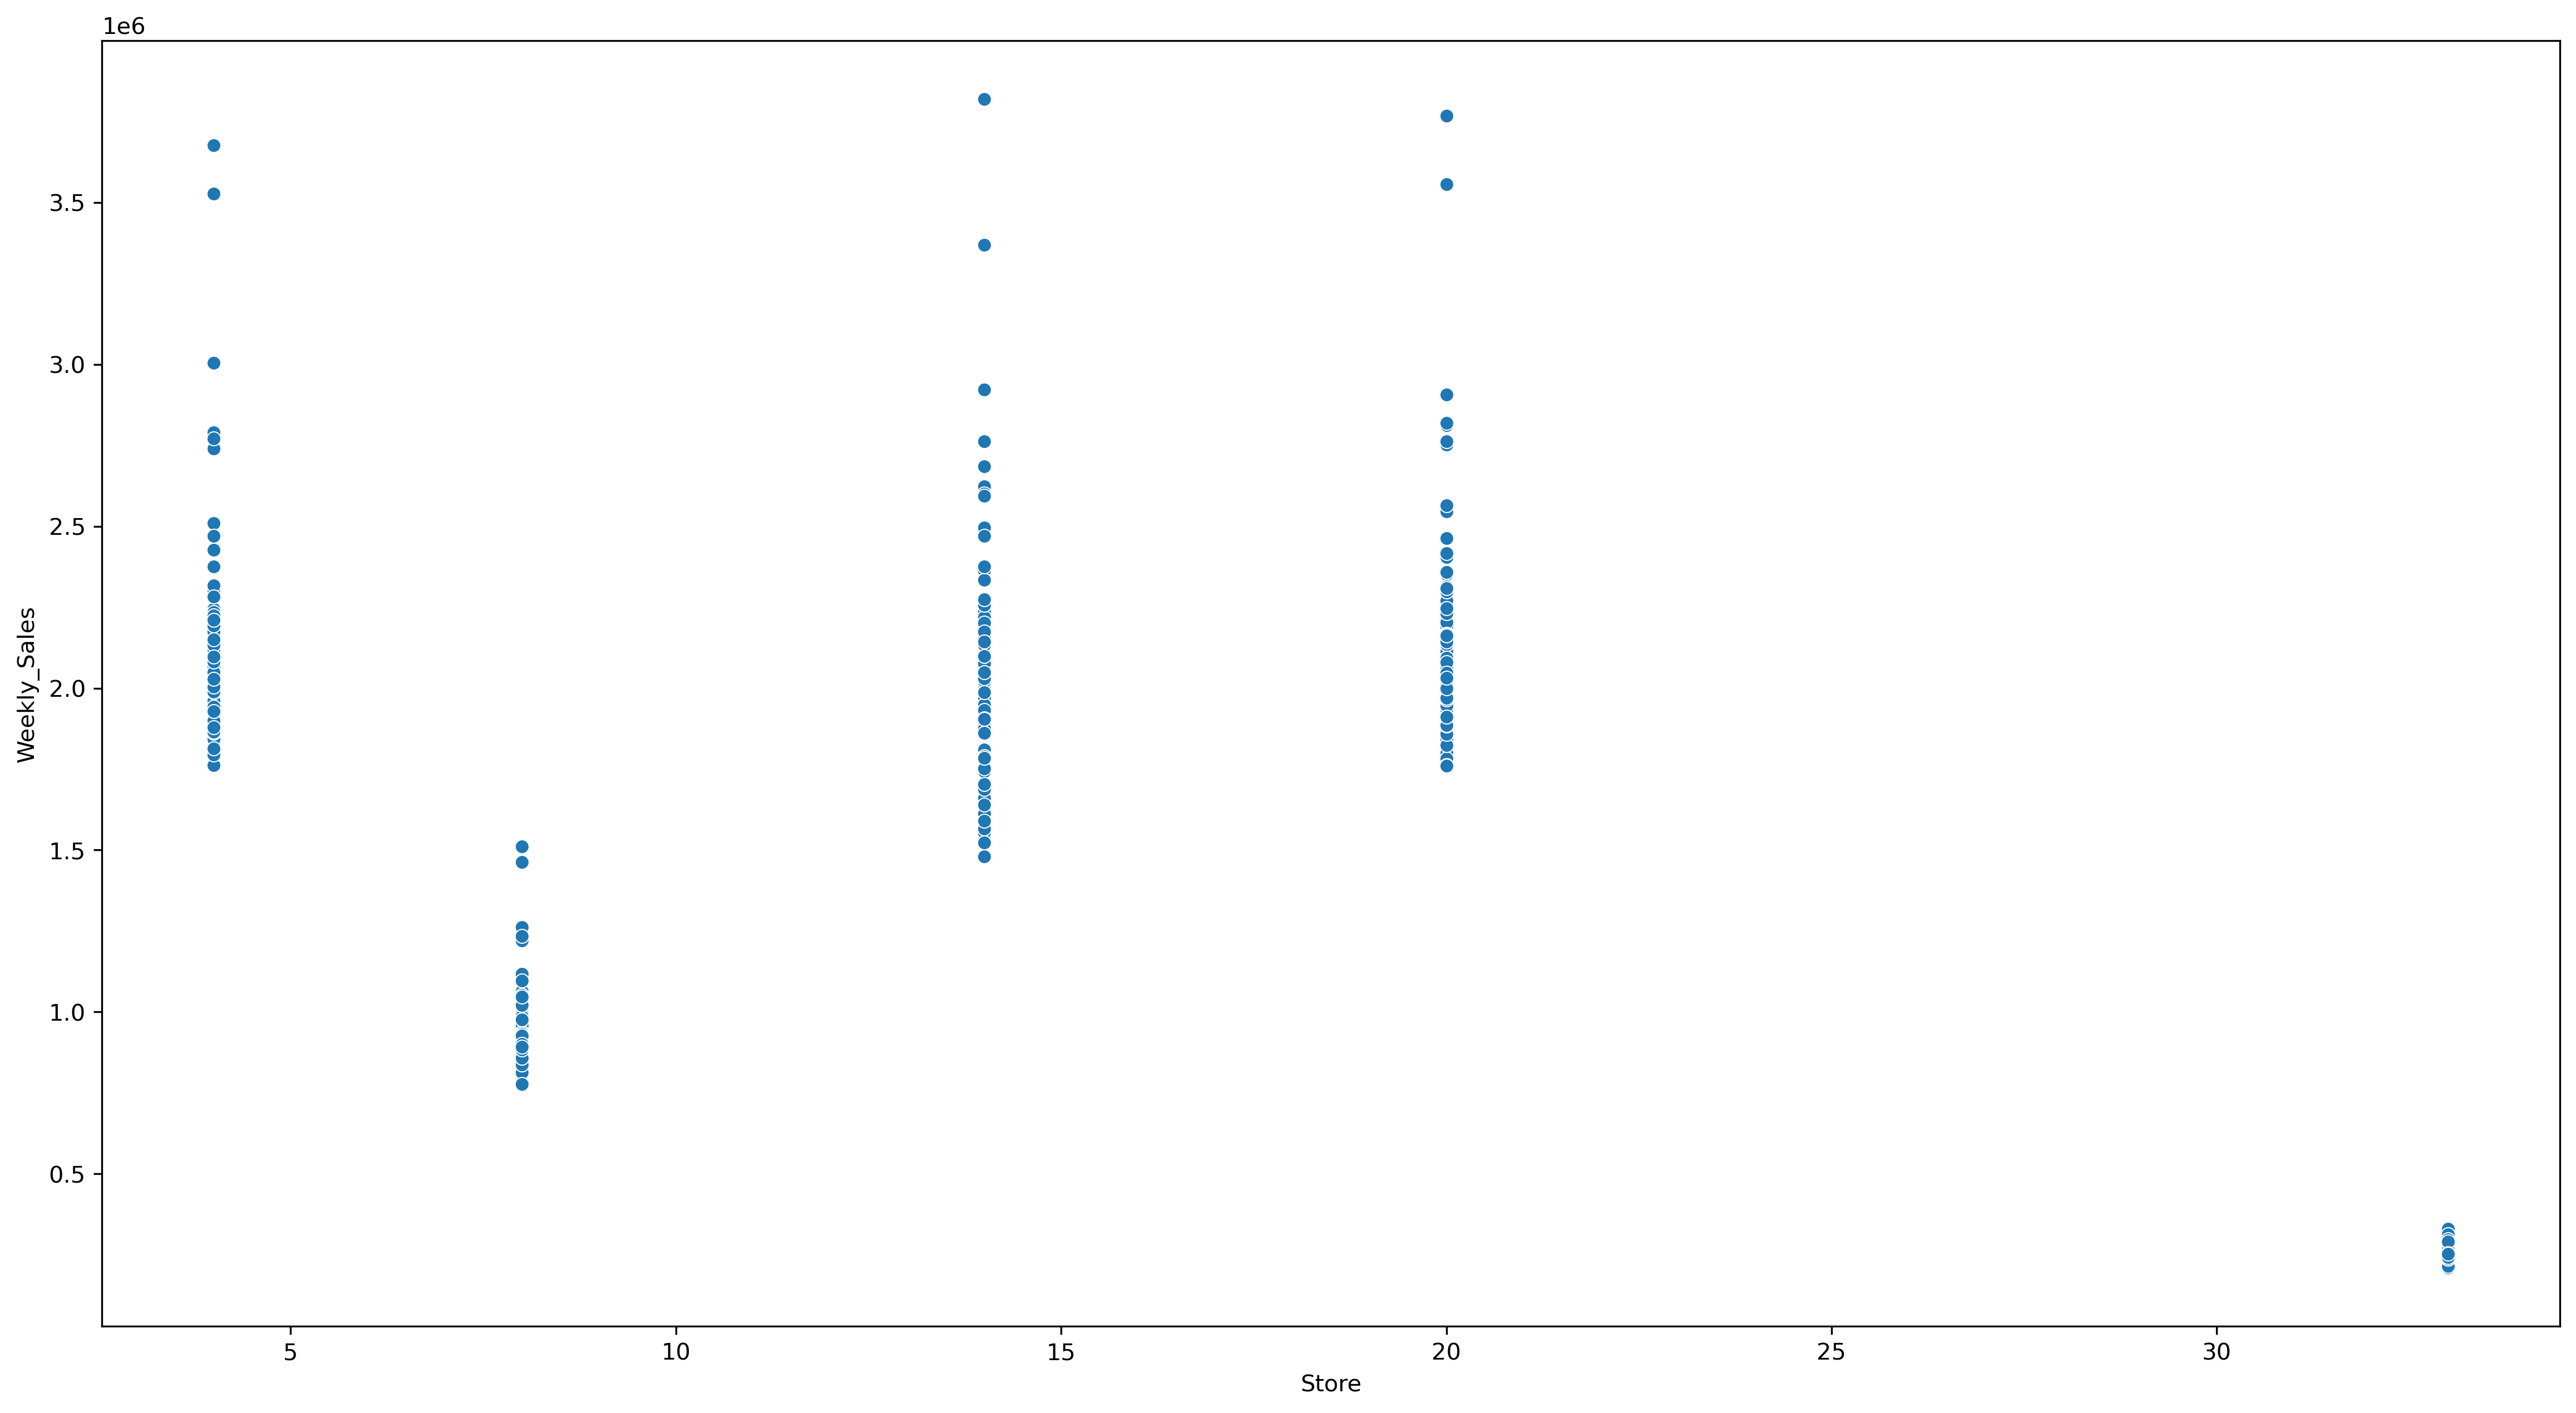

In [731]:
#Distribuição das vendas semanais da loja 20
dynamics.gráfico_de_dispersão()

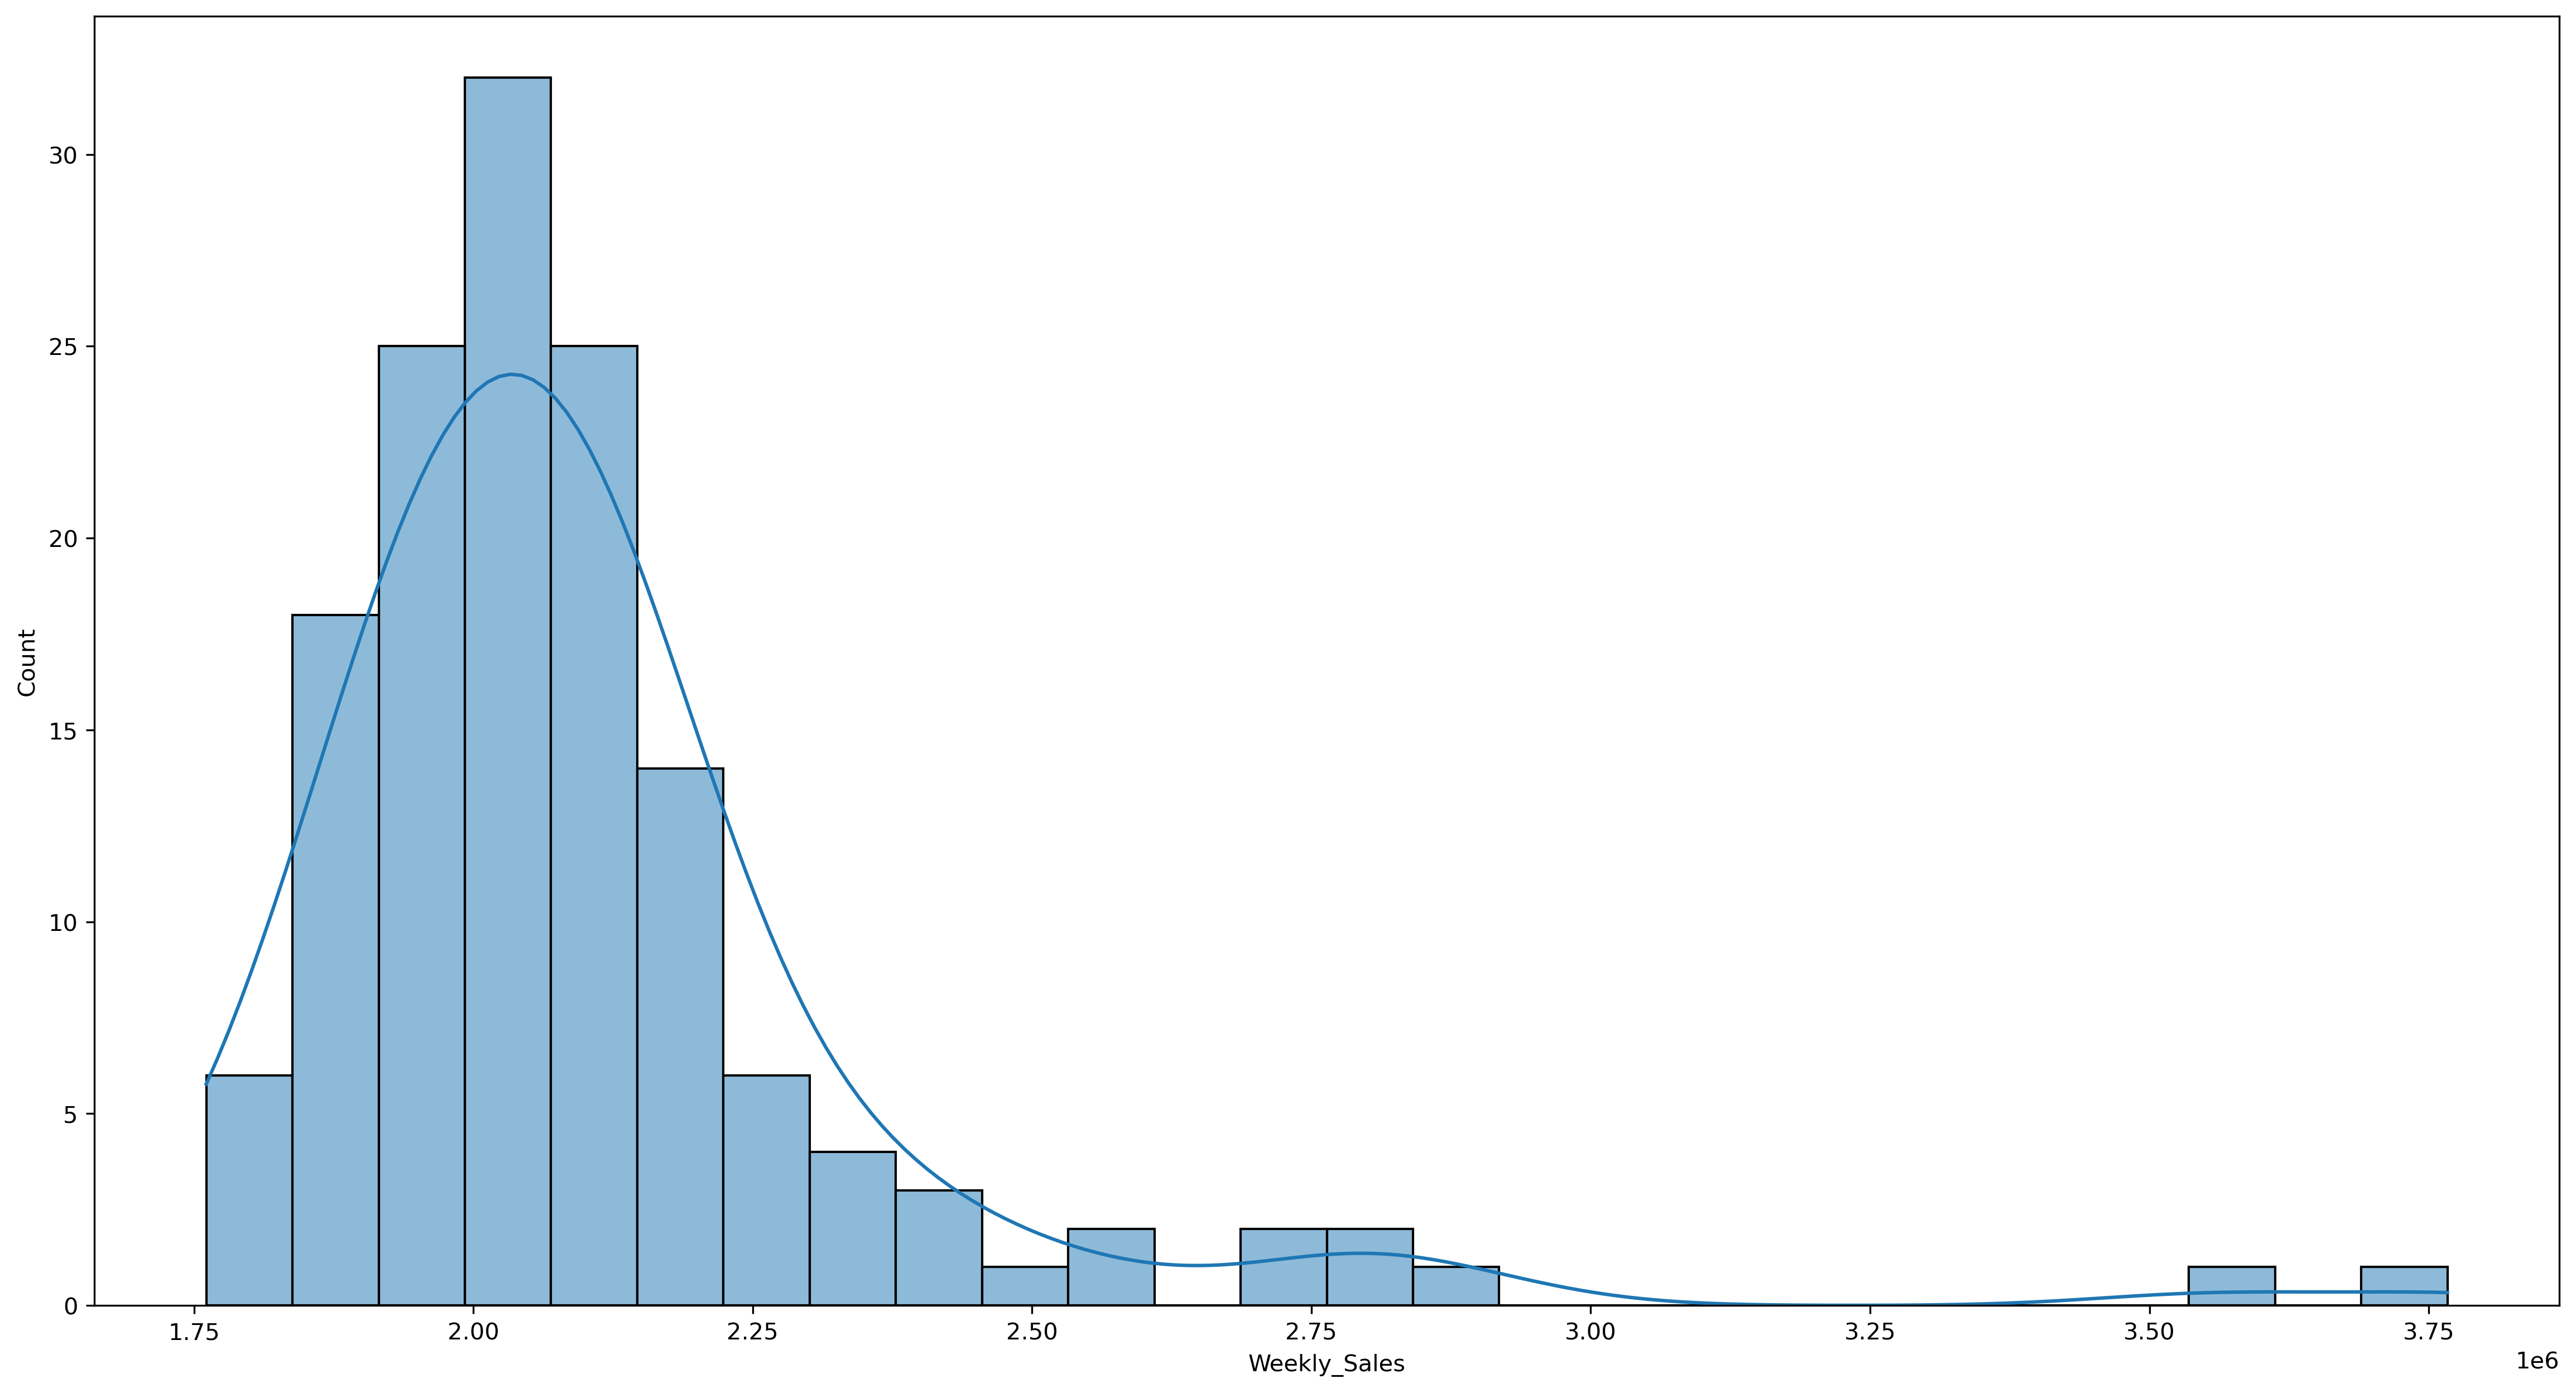

In [732]:
# Verificando se as vendas em período de feriado tem uma variação maior:
dynamics.verificando_se_as_vendas_em_período_de_feriado_tem_uma_variação_maior()

# Etapa 02

## Amostragem Simples 

In [733]:
# Amostrando simples usando o random_state
dynamics.amostragem_simples()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
3724,27,2010-03-19,1700627.97,0,49.04,2.960,135.668225,8.237,3,2010
2463,18,2010-09-17,997998.21,0,60.94,2.716,132.767067,9.342,9,2010
1765,13,2011-01-14,1682316.31,0,20.60,2.903,127.300935,7.470,1,2011
800,6,2011-09-23,1336044.75,0,78.49,3.467,217.918847,6.925,9,2011
6405,45,2012-04-06,899479.43,0,49.73,3.996,190.685171,8.567,4,2012
3808,27,2011-10-28,1710372.40,0,51.81,3.757,140.444790,7.906,10,2011
4626,33,2011-01-21,244856.44,0,59.46,3.336,127.440484,8.951,1,2011
3417,24,2012-07-20,1394299.00,0,76.42,3.732,138.233193,8.953,7,2012
3556,25,2012-06-22,721601.90,0,73.52,3.564,214.606000,7.139,6,2012
2571,18,2012-10-12,1074079.00,0,50.97,4.029,138.911700,8.243,10,2012


In [734]:
# Amostrando simples usando o seed
dynamics.amostragem_simples_usando_o_seed()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
3949,28,2011-10-14,1220984.94,0,67.31,3.805,129.770645,12.890,10,2011
4555,32,2012-06-08,1246322.44,0,71.14,3.741,197.655186,8.090,6,2012
2235,16,2011-10-28,505918.21,0,41.97,3.550,195.331898,6.232,10,2011
5204,37,2011-03-04,527572.25,0,64.55,3.288,212.576205,8.395,3,2011
3524,25,2011-11-11,719235.07,0,44.81,3.530,210.981020,7.082,11,2011


In [735]:
# Quantidade de classes distintas na amostra
dynamics.quantidade_de_classes_distintas_na_amostra()

42    0.266667
19    0.133333
1     0.133333
44    0.066667
4     0.066667
30    0.066667
36    0.066667
6     0.066667
27    0.066667
37    0.066667
Name: Store, dtype: float64

## Amostragem Sistemática 

In [736]:
# Amostragem sistemática com passo e primeiro valor definidos
dynamics.amostragem_sistematica()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
132,1,2012-08-17,1597868.05,0,84.85,3.571,222.038411,6.908,8,2012
157,2,2010-05-14,1880752.36,0,73.31,2.854,209.998458,8.200,5,2010
182,2,2010-11-05,1939061.41,0,57.85,2.689,211.613505,8.163,11,2010
207,2,2011-04-29,1745545.28,0,69.21,3.810,215.277268,7.931,4,2011
232,2,2011-10-21,1834680.25,0,64.53,3.353,217.165004,7.441,10,2011
...,...,...,...,...,...,...,...,...,...,...
6332,45,2010-11-12,765648.93,0,46.14,2.931,182.991613,8.724,11,2010
6357,45,2011-05-06,810150.64,0,58.21,4.046,185.937438,8.521,5,2011
6382,45,2011-10-28,781694.57,0,51.78,3.569,187.877491,8.523,10,2011
6407,45,2012-04-20,776661.74,0,63.13,4.027,190.813801,8.567,4,2012


## Amostragem Estratificada 

In [737]:
# Verificando quantos tipos diferentes de classe temos na amostra
dynamics.amostragem_estratificada()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64


In [738]:
# Amostragem estratificada usando train_test_split
dynamics.amostragem_estratificada_usando_train_test_split()

15    1
17    1
30    1
6     1
18    1
4     1
10    1
31    1
1     1
32    1
36    1
20    1
25    1
26    1
44    1
34    1
33    1
9     1
8     1
42    1
23    1
38    1
13    1
39    1
37    1
11    1
40    1
3     1
12    1
43    1
16    1
2     1
41    1
35    1
22    1
24    1
5     1
45    1
19    1
27    1
29    1
7     1
14    1
21    1
28    1
Name: Store, dtype: int64


## Amostragem Clusterizada 

In [739]:
# Amostragem clusterizada selecionando apenas algumas semanas da loja 20
dynamics.amostragem_clusterizada()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
2799,20,2011-09-02,2141765.98,0,70.82,3.703,208.962516,7.274,9,2011
2836,20,2012-05-18,2039222.26,0,60.99,3.848,214.548557,7.139,5,2012
2732,20,2010-05-21,1893736.90,0,60.38,2.958,203.877024,7.856,5,2010
2770,20,2011-02-11,2211388.14,1,25.38,3.239,206.076386,7.343,2,2011
2722,20,2010-03-12,2010974.84,0,43.82,2.818,204.525060,8.187,3,2010
2822,20,2012-02-10,2462978.28,1,33.47,3.640,213.118614,6.961,2,2012
2827,20,2012-03-16,2064991.71,0,53.73,3.862,214.016713,6.961,3,2012
2831,20,2012-04-13,2045396.06,0,45.68,4.044,214.312703,7.139,4,2012
2790,20,2011-07-01,2053165.41,0,69.66,3.748,208.334643,7.274,7,2011
2813,20,2011-12-09,2546123.78,0,41.64,3.415,211.866786,7.082,12,2011


# Etapa 03 (PLUS)

## Distribuição Normal


<img alt="Correlação" width="85%" src="https://proeducacional.com/packages/uploads/2020/08/img_5f2ae87aaa0c2.png">


A partir deste momento, vamos analisar somente os dados da loja 20 conforme foi pedido lá em cima. Usando todos os dados da loja 20, veja se as vendas seguem uma distribuição normal.

In [740]:
# Filtrando o dataset e vendo seu histograma


<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





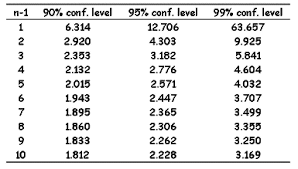

![](https://www.statisticshowto.com/wp-content/uploads/2021/12/confidence-limits.bmp)

In [741]:
# Realizando o teste com uma amostragem aleatória simples com 25 amostras -> Teste T


In [742]:
# Verificando a média da população


In [743]:
# Visualizando a distribuição dos dados como ele são


In [744]:
# Visualizando a distribuição dos dados aplicando o teorema do limite central


In [745]:
# Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal



In [746]:
# Verificando a média da população
